# Programmering og Modellering Prosjekt - oppgave 3

## av Vebjørn og Sam

Kreftene som virker mellom planeter i x og y retning kan utrykkes slik:

#### Newtons universelle gravitasjonslov

$\space$

$$F_x = -\frac{G \cdot m_1 \cdot m_2 \cdot x(t)}{r^3}$$


$$ = -\frac{G \cdot m_1 \cdot m_2 \cdot x(t)}{((x(t) - x_2(t))^2 + (y(t)-y_2(t))^2)^\frac{3}{2})}$$


$\space$

$$F_y = - \frac{G \cdot m_1 \cdot m_2 \cdot y(t)}{r^3}$$

$$ = - \frac{G \cdot m_1 \cdot m_2 \cdot y(t)}{((x(t)-x_2(t))^2 + (y(t)-y_2(t))^2)^\frac{3}{2})}$$


$\space$


---



## a) 

Dette er newtons universelle gravitasjonslov, den beregner summen av krefter som virker på en planet. Dette kan vi bruke den til finne akselerasjonen til et legeme gjennom de følgende stegene. når vi har funnet akselerasjonen kan vi bruke dette til å finne fart og posisjon ved hjelp av differensiallikninger, som vi kan løse numerisk ved hjelp av eulers- og euler-cromers metode.

Vi har en m_2 som er solas masse også har m_1 som er massen til legemet.

Vi har at  $ \sum F = a \cdot m$ vi setter $ a\cdot m_1 $ for $F$ siden vi har $m_1$ på begge sider trekker vi den ut. Da blir det slik: 

$$a_x(t) = - \frac{G \cdot m_2 \cdot x(t)}{r^3}$$

$$a_y(t) = - \frac{G \cdot m_2 \cdot y(t)}{r^3}$$

$\space$

---



## b)
Vi må løse disse likningene for finne neste steg i systemet. 
 
Vi vil finne ut av hvordan planeten beveger seg, altså vi vil finne posisjonen til planeten ved et gitt tidspunkt. For å gjøre dette må vi løse akselerasjons og farts likningene. Det må vi fordi vi trenger den deriverte av posisjon (fart) til å finne neste posisjon, og for å finne fart må vi ha den deriverte til fart (akselerasjon). 
 
Hvorfor må vi løse akselerasjons og fartslikningene? Fordi eulersmetode er, (neste steg i systemet) = (forrige steg) + (stigningen i steget/den deriverte) * (steg lengde), $P(t_{n+1}) = P(t_n) + P'(t_n) \cdot dt$ også gjør den det for både fart og akselerasjon. Fordi for å finne farten må man bare utføre den metoden med akselerasjon
 
Forutsatt for at vi kan løse dette er at vi har startverdier for posisjon, fart og akselerasjon.
 
 
 
 
$$x'(t) = v_x(t)$$
 
$$y'(t) = v_y(t)$$
 
$$v'_x(t) = - \frac{G \cdot m_2 \cdot x(t)}{r^3}$$
 
$$v'_y(t) = - \frac{G \cdot m_2 \cdot y(t)}{r^3}$$
 
$\space$
 
 
 
---





## c)

#### eulers metode (jorda)

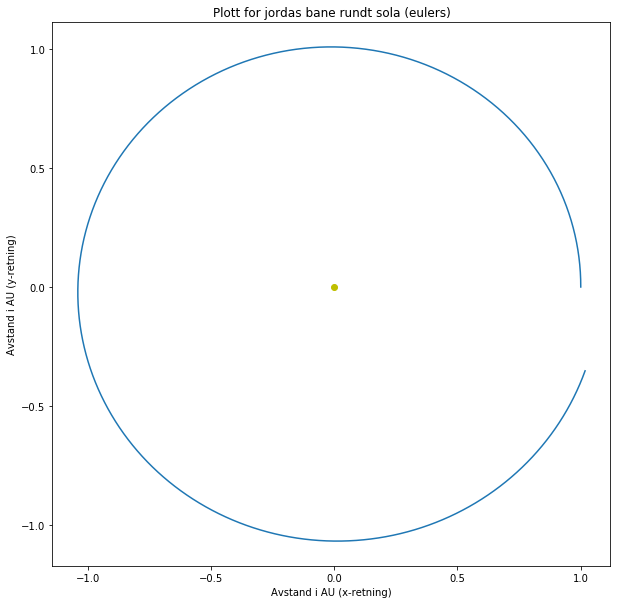

In [4]:
from pylab import *

# variabler og konstanter 
G = 4*pi**2
#r = 1.50 * 1E11 # AU astronomical unit
m_1 = 3*1E-6
m_2 = 1
x0 = 1
y0 = 0
vx0 = 0
vy0 = 2*pi

x2 = 0
y2 = 0

# tidsparameter 
a = 0
b = 1
N = 1000
t = linspace(a,b,N)
dt = t[1]-t[0]


# arrayer 
x = zeros(N+1)
y = zeros(N+1)
vx = zeros(N+1)
vy = zeros(N+1)


# intitialisering 
t[0] = a
x[0] = x0
y[0] = y0
vx[0] = vx0
vy[0] = vy0



# eulers metode
for i in range(N):
    a_x = -G*m_2*x[i]/((x[i]-x2)**2 + (y[i]-y2)**2)**(3/2)    #uttrykket som står i nevner er det samme som norm[xy]**3
    a_y = -G*m_2*y[i]/((x[i]-x2)**2 + (y[i]-y2)**2)**(3/2)
    vx[i+1] = vx[i] + a_x*dt
    vy[i+1] = vy[i] + a_y*dt
    x[i+1] = x[i] + vx[i]*dt
    y[i+1] = y[i] + vy[i]*dt

figure(figsize=(10,10))
#plot for sola
plot(0,0,"yo")

#plot for jordas bane
plot(x,y)
title("Plott for jordas bane rundt sola (eulers)")
xlabel("Avstand i AU (x-retning)")
ylabel("Avstand i AU (y-retning)")
show()

Vi ser at vi får en bane rundt sola som er på ca ett år, for den er nesten rund, men vi ser at det ikke er en stabil bane fordi den vil tilsynelatende ikke treffe startpunktet. Dette kan være fordi eulers- metode ikke er så veldig stabil. Derfor bruker vi eulerscromers metode istedenfor den ser ut til å være med stabil i forhold til resultatene i d).

## d)

#### eulers -cromers metode u klasser

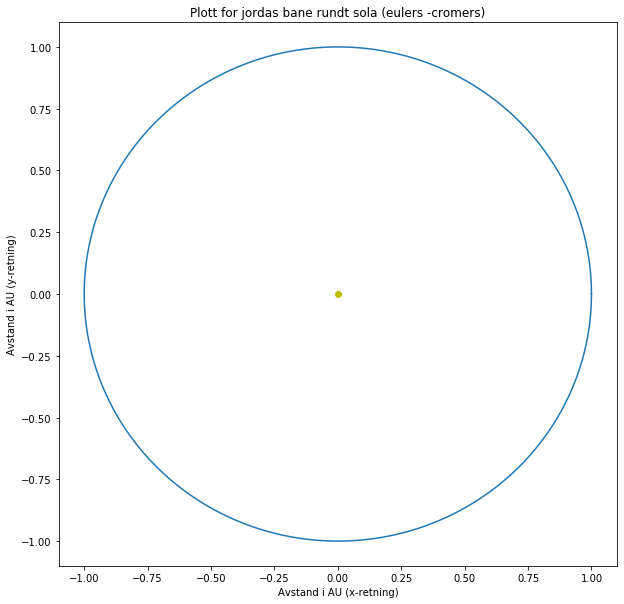

In [2]:
from pylab import *

# variabler og konstanter
G = 4*pi**2
m_1 = 3*1E-6
m_2 = 1
x0 = 1          #startverdier
y0 = 0
vx0 = 0
vy0 = 2*pi

x2 = 0
y2 = 0

# tidsparameter
a = 0
b = 1
N = 1000000
t = linspace(a,b,N)
dt = t[1]-t[0]


# arrayer
x = zeros(N+1)
y = zeros(N+1)
vx = zeros(N+1)
vy = zeros(N+1)


# intitialisering
t[0] = a
x[0] = x0
y[0] = y0
vx[0] = vx0
vy[0] = vy0



# eulers -cromers metode
for i in range(N):
    a_x = -G*m_2*x[i]/((x[i]-x2)**2 + (y[i]-y2)**2)**(3/2)      #uttrykket i teller er det samme som norm[xy]**3
    a_y = -G*m_2*y[i]/((x[i]-x2)**2 + (y[i]-y2)**2)**(3/2)
    vx[i+1] = vx[i] + a_x*dt
    vy[i+1] = vy[i] + a_y*dt
    x[i+1] = x[i] + vx[i+1]*dt
    y[i+1] = y[i] + vy[i+1]*dt

figure(figsize=(10,10))
#plot for sola
plot(0,0,"yo")
#plott for jorda
plot(x,y)
title("Plott for jordas bane rundt sola (eulers -cromers)")
xlabel("Avstand i AU (x-retning)")
ylabel("Avstand i AU (y-retning)")

show()

#### Versjon med klasser

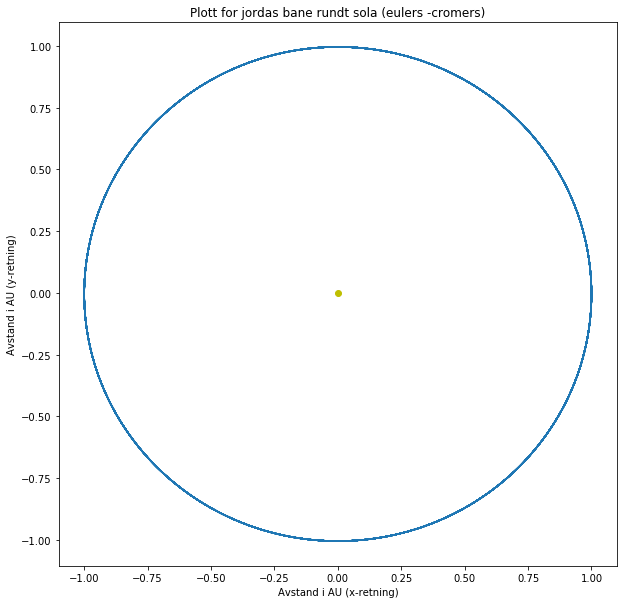

In [5]:
from pylab import *

# variabler 
G = 4*pi**2
m_sol = 1

# tidsparameter
a = 0
b = 15
N = 10000
t = linspace(a,b,N)
dt = t[1]-t[0]

# array med jordas start verdier
testarray = array([1,0,0,2*pi,1])

class planeter: # lager classe som en måte å lagre informasjon til en planet
    def __init__(self, data): # som kan hentes ut for forskjellige forekomster av classen
        
        self.x0 = data[0] 
        self.y0 = data[1]
        self.vx0 = data[2]
        self.vy0 = data[3]
        self.m = data[4]
        
        # arrayer 
        self.x = zeros(N+1)
        self.y = zeros(N+1)
        self.vx = zeros(N+1)
        self.vy = zeros(N+1)
        
        # intitialisering
        self.x[0] = self.x0
        self.y[0] = self.y0
        self.vx[0] = self.vx0
        self.vy[0] = self.vy0
        
        
    def eulercromers(self): # en method for classen planeter, regner ut banen med euler-cromers metode

        x2 = 0
        y2 = 0

        for i in range(N):
    
            a_x = -G*m_sol*self.x[i]/((self.x[i]-x2)**2 + (self.y[i]-y2)**2)**(3/2) 
            a_y = -G*m_sol*self.y[i]/((self.x[i]-x2)**2 + (self.y[i]-y2)**2)**(3/2)
            
            self.vx[i+1] = self.vx[i] + a_x*dt
            self.vy[i+1] = self.vy[i] + a_y*dt
            
            self.x[i+1] = self.x[i] + self.vx[i+1]*dt
            self.y[i+1] = self.y[i] + self.vy[i+1]*dt

        
jorda = planeter(testarray) # lager en forekomst "jorda" av klassen planet

jorda.eulercromers() # bruker eulercromers metode på forekomsten "jorda" av klassen planet

figure(figsize=(10,10)) 
plot(0,0,"yo")
plot(jorda.x,jorda.y) # henter ut bestemt informasjon av forekomsten "jorda" av klassen planet
title("Plott for jordas bane rundt sola (eulers -cromers)")
xlabel("Avstand i AU (x-retning)")
ylabel("Avstand i AU (y-retning)")
show()

Jordas bane møter startpunktet. Vi kan konkludere med at eulercromersmetode er mer stabil. Det andre programmet med klasser lager vi fordi vi forsøker å lage ett objektbasert program som kan gjøre det lettere å tilføre flere planeter i de neste oppgavene.


## e) 


#### plot for alle planeter m klasser

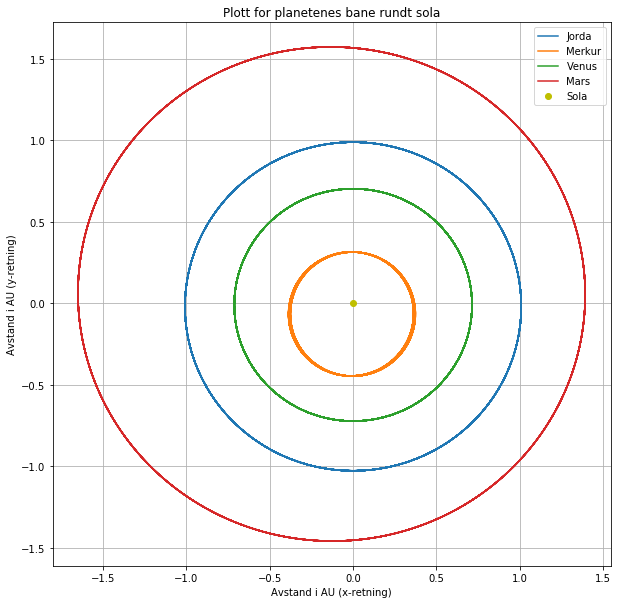

In [1]:
from pylab import *

# variabler 
G = 4*pi**2
m_sol = 1

# tidsparameter
a = 0
b = 15
N = 10000
t = linspace(a,b,N)
dt = t[1]-t[0]

with open("planeter_data.dat","r") as infile: # åpner data filen "planeter_data.dat slik at vi kan lese innholdet
    P = int(infile.readline()) # leser 0te linje i fila, gjør det til integer
    P_i = zeros([P,5]) # lager en array med P arrayer med størrelse 5
    
    for i,line in enumerate(infile):
        data = line.split() # lager en array med elementer 
        
        # putter inn infoen fra fila i array P_i "planeter info"
        P_i[i,0] = float(data[1]) 
        P_i[i,1] = float(data[2])
        P_i[i,2] = float(data[3])
        P_i[i,3] = float(data[4])
        P_i[i,4] = float(data[5])
        

class planeter:
    def __init__(self, data):   
        
        # henter ut data fra array, som lager forekomst av klassen
        self.x0 = data[0]
        self.y0 = data[1]
        self.vx0 = data[2]
        self.vy0 = data[3]
        self.m = data[4]
        
        # arrayer som lagres i forekomster av classen
        self.x = zeros(N+1)
        self.y = zeros(N+1)
        self.vx = zeros(N+1)
        self.vy = zeros(N+1)
        
        # intitialisering
        self.x[0] = self.x0
        self.y[0] = self.y0
        self.vx[0] = self.vx0
        self.vy[0] = self.vy0

        
Aplaneter = [] # tom liste, 'alle planeter'
        
for p in range(P):
    Aplaneter.append(planeter(P_i[p,:]))  # fyller lista med forekomster av classen planeter


for i in range(N):
    for j in range(P): # Aplaneter[j] er en forekomst av klassen planeter, .'noe' kaller på informasjon knyttet til den forekomsten
        pos_planet = array([Aplaneter[j].x[i],Aplaneter[j].y[i]]) # setter x, y til en posisjons array/ posisjons vektor, 
        fart_planet = array([Aplaneter[j].vx[i],Aplaneter[j].vy[i]]) # setter vx, vy til fart array/ farts vektor,
        
        r = norm(pos_planet) # radiusen er lik lengden til posisjons vektoren
        a = -G*m_sol*pos_planet/r**3 #regner ut aksellerasjonen til (planet j)  
        
        for k in range(P):
            if k != j: # hente ut bidrag fra andre planeter
                pos_andreplanet = array([Aplaneter[k].x[i],Aplaneter[k].y[i]]) 
                fart_andreplanet = array([Aplaneter[k].vx[i],Aplaneter[k].vy[i]])
                
                rr = norm(pos_planet - pos_andreplanet) # avstanden mellom planetene
                a -= G*Aplaneter[k].m*(pos_planet - pos_andreplanet)/rr**3 # aksellerasjon til planet j påvirket av planet k
                # regner ut posisjon til planet j ved med eulercromers metode.
        Aplaneter[j].vx[i+1] = Aplaneter[j].vx[i] + dt*a[0] 
        Aplaneter[j].vy[i+1] = Aplaneter[j].vy[i] + dt*a[1]
        Aplaneter[j].x[i+1] = Aplaneter[j].x[i] + dt*Aplaneter[j].vx[i+1]
        Aplaneter[j].y[i+1] = Aplaneter[j].y[i] + dt*Aplaneter[j].vy[i+1]

navn = ['Jorda','Merkur','Venus','Mars'] # liste med navn for riktig label

figure(figsize=(10,10)) # setter en størrelse på figuren
grid()

for l in range(P):
    plot(Aplaneter[l].x,Aplaneter[l].y,label=navn[l]) # plotter posisjonen til planet p


plot(0,0,"yo",label='Sola') # plotter sola
legend(prop={'size': 10}) # viser labels, setter størrelse label 
title("Plott for planetenes bane rundt sola")
xlabel("Avstand i AU (x-retning)")
ylabel("Avstand i AU (y-retning)")

show() # viser plot

Vi ser at noen baner er tjukkere enn andre. Når vi forandrer litt på tids parametrene, gjør den kortere og lengre ser vi at det er fordi f.eks merkur snurrer mange ganger rundt sola på samme tid som mars gjør det noen få ganger og streken blir tykkere fordi det er små variasjoner i hver bane. Det er da også viktig å tenke på at størrelsen på tids stegene skaper større variasjoner på planetene som beveger seg raskest. (Merkur) 

## f) 


#### første pygame (første versjon)

In [0]:
from pylab import *
import pygame

# variabler 
G = 4*pi**2
m_sol = 1

# tidsparameter
a = 0
b = 15
N = 10000
t = linspace(a,b,N)
dt = t[1]-t[0]

with open("planeter_data.dat","r") as infile: # åpner data filen "planeter_data.dat slik at vi kan lese innholdet
    P = int(infile.readline()) # leser 0te linje i fila, gjør det til integer
    P_i = zeros([P,5]) # lager en array med P arrayer med størrelse 5
    
    for i,line in enumerate(infile):
        data = line.split() # lager en array med elementer 
        
        # putter inn infoen fra fila i array P_i "planeter info"
        P_i[i,0] = float(data[1]) 
        P_i[i,1] = float(data[2])
        P_i[i,2] = float(data[3])
        P_i[i,3] = float(data[4])
        P_i[i,4] = float(data[5])
        

class planeter:
    def __init__(self, data):   
        
        # henter ut data fra array, som lager forekomst av klassen
        self.m = data[4]
        
        # arrayer som lagres i forekomster av classen
        self.x = zeros(N+1)
        self.y = zeros(N+1)
        self.vx = zeros(N+1)
        self.vy = zeros(N+1)
        
        # intitialisering
        self.x[0] = data[0]
        self.y[0] = data[1]
        self.vx[0] = data[2]
        self.vy[0] = data[3]

        
Aplaneter = [] # tom liste, 'alle planeter'
        
for p in range(P):
    Aplaneter.append(planeter(P_i[p,:]))  # fyller lista med forekomster av classen planeter


for i in range(N):
    for j in range(P): # Aplaneter[j] er en forekomst av klassen planeter, .'noe' kaller på informasjon knyttet til den forekomsten
        pos_planet = array([Aplaneter[j].x[i],Aplaneter[j].y[i]]) # setter x, y til en posisjons array/ posisjons vektor, 
        fart_planet = array([Aplaneter[j].vx[i],Aplaneter[j].vy[i]]) # setter vx, vy til fart array/ farts vektor,
        
        r = norm(pos_planet) # radiusen er lik lengden til posisjons vektoren
        a = -G*m_sol*pos_planet/r**3 #regner ut aksellerasjonen til (planet j)  
        
        for k in range(P):
            if k != j: # hente ut bidrag fra andre planeter
                pos_andreplanet = array([Aplaneter[k].x[i],Aplaneter[k].y[i]]) 
                fart_andreplanet = array([Aplaneter[k].vx[i],Aplaneter[k].vy[i]])
                
                rr = norm(pos_planet - pos_andreplanet) # avstanden mellom planetene
                a -= G*Aplaneter[k].m*(pos_planet - pos_andreplanet)/rr**3 # aksellerasjon til planet j påvirket av planet k
                # regner ut posisjon til planet j ved med eulercromers metode.
        Aplaneter[j].vx[i+1] = Aplaneter[j].vx[i] + dt*a[0] 
        Aplaneter[j].vy[i+1] = Aplaneter[j].vy[i] + dt*a[1]
        Aplaneter[j].x[i+1] = Aplaneter[j].x[i] + dt*Aplaneter[j].vx[i+1]
        Aplaneter[j].y[i+1] = Aplaneter[j].y[i] + dt*Aplaneter[j].vy[i+1]


# variabler for skjermstørrelse
width = 851
hight = 851

# definerer globale variabler til pygame
i = 0
d = 2       # for størrelsesforhold

win = pygame.display.set_mode((width, hight))           # definerer vinduet
pygame.display.set_caption("planet baner simulasjon")   # navn på pygame

# solas posisjon (midt i)
sx = int(round(width / 2))
sy = int(round(hight / 2))
sol = (sx, sy)

# gameloop
run = True
while run:
    # gjør at det er mulig å avslutte
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            run = False
    
    win.fill((0,0,0))   # svart bakgrunn 

    # i fungerer som index teller  
    i += 1

    # definerer hver enkelt planet sin posisjon for seg og tegner i pygamevindu
    jx = int(round(sx + d*100*Aplaneter[0].x[i])) 
    jy = int(round(sy + d*100*Aplaneter[0].y[i]))
    jorda = (jx,jy)
    pygame.draw.circle(win,(95,128,174),jorda,7)
    
    mex = int(round(sx + d*100*Aplaneter[1].x[i]))
    mey = int(round(sy + d*100*Aplaneter[1].y[i]))
    merkur = (mex,mey)
    pygame.draw.circle(win,(140,140,148),merkur,4)
    
    vex = int(round(sx + d*100*Aplaneter[2].x[i]))
    vey = int(round(sy + d*100*Aplaneter[2].y[i]))
    venus = (vex,vey)
    pygame.draw.circle(win,(237,177,81),venus,6)
    
    mx = int(round(sx + d*100*Aplaneter[3].x[i]))
    my = int(round(sy + d*100*Aplaneter[3].y[i]))
    mars = (mx,my)
    pygame.draw.circle(win,(147,72,56),mars,5)
    
    pygame.draw.circle(win,(255,255,0),sol,11) # tegner sola
    
    pygame.display.update()                    # oppdaterer pygame vindu
    
pygame.quit()


#### pygamesimulering av planetpaner (siste versjon)

In [ ]:
from pylab import *
import pygame

# variabler 
G = 4*pi**2
m_sol = 1

# tidsparameter
a = 0
b = 15
N = 10000
t = linspace(a,b,N)
dt = t[1]-t[0]

with open("planeter_data.dat","r") as infile: # åpner data filen "planeter_data.dat slik at vi kan lese innholdet
    P = int(infile.readline()) # leser 0te linje i fila, gjør det til integer
    P_i = zeros([P,5]) # lager en array med P arrayer med størrelse 5
    
    for i,line in enumerate(infile):
        data = line.split() # lager en array med elementer 
        
        # putter inn infoen fra fila i array P_i "planeter info"
        P_i[i,0] = float(data[1]) 
        P_i[i,1] = float(data[2])
        P_i[i,2] = float(data[3])
        P_i[i,3] = float(data[4])
        P_i[i,4] = float(data[5])
        

class planeter:
    def __init__(self, data):   
        
        # henter ut data fra array, som lager forekomst av klassen
        self.m = data[4]
        
        # arrayer som lagres i forekomster av classen
        self.x = zeros(N+1)
        self.y = zeros(N+1)
        self.vx = zeros(N+1)
        self.vy = zeros(N+1)
        
        # intitialisering
        self.x[0] = data[0]
        self.y[0] = data[1]
        self.vx[0] = data[2]
        self.vy[0] = data[3]

        
Aplaneter = [] # tom liste, 'alle planeter'
        
for p in range(P):
    Aplaneter.append(planeter(P_i[p,:]))  # fyller lista med forekomster av classen planeter


for i in range(N):
    for j in range(P): # Aplaneter[j] er en forekomst av klassen planeter, .'noe' kaller på informasjon knyttet til den forekomsten
        pos_planet = array([Aplaneter[j].x[i],Aplaneter[j].y[i]]) # setter x, y til en posisjons array/ posisjons vektor, 
        fart_planet = array([Aplaneter[j].vx[i],Aplaneter[j].vy[i]]) # setter vx, vy til fart array/ farts vektor,
        
        r = norm(pos_planet) # radiusen er lik lengden til posisjons vektoren
        a = -G*m_sol*pos_planet/r**3 #regner ut aksellerasjonen til (planet j)  
        
        for k in range(P):
            if k != j: # hente ut bidrag fra andre planeter
                pos_andreplanet = array([Aplaneter[k].x[i],Aplaneter[k].y[i]]) 
                fart_andreplanet = array([Aplaneter[k].vx[i],Aplaneter[k].vy[i]])
                
                rr = norm(pos_planet - pos_andreplanet) # avstanden mellom planetene
                a -= G*Aplaneter[k].m*(pos_planet - pos_andreplanet)/rr**3 # aksellerasjon til planet j påvirket av planet k
                # regner ut posisjon til planet j ved med eulercromers metode.
        Aplaneter[j].vx[i+1] = Aplaneter[j].vx[i] + dt*a[0] 
        Aplaneter[j].vy[i+1] = Aplaneter[j].vy[i] + dt*a[1]
        Aplaneter[j].x[i+1] = Aplaneter[j].x[i] + dt*Aplaneter[j].vx[i+1]
        Aplaneter[j].y[i+1] = Aplaneter[j].y[i] + dt*Aplaneter[j].vy[i+1]

pygame.init()       # starter pygame

# variabler for skjermstørrelse
width = 851
hight = 851

# definerer globale variabler til pygame
i = 0
d = 2       # for størrelsesforhold
yr = 0
win = pygame.display.set_mode((width, hight))           # definerer vinduet
pygame.display.set_caption("planet baner simulasjon")   # navn på pygame
skrift = pygame.font.SysFont("monospace", 30)           # definerer font

# solas posisjon (midt i)
sx = int(round(width / 2))
sy = int(round(hight / 2))
sol = (sx, sy)

# definerer tekst farger og størrelse på planeter
tekst = "År: "
easteregg1 = "Its corona time!!! "
easteregg2 = "Det siste mennesket dør ut på grunn av et virus ingen tok seriøst. "
farger = [(95, 128, 174),(140, 140, 148),(237, 177, 81),(147, 72, 56)]  # lager liste med tupler i for å få riktig farger
strl = [7,4,6,5]                                                        # lager liste med planetstørrelser
# definerer omtrent ett år
år = int(round(N/b))

# gameloop
run = True
while run:
    # gjør at det er mulig å avslutte
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            run = False

    win.fill((0,0,0))   # svart bakgrunn

    t = skrift.render(tekst + str(yr), 12, (255, 255, 255))     # lager tekst som kan brukes i pygame
    win.blit(t, (1, 1))                                         # sender til skjerm
    pygame.draw.circle(win,(255,255,0),sol, 30)                 # tegner sola
    i += 1                                                      # loopen slutter når i==N
    # tegneloopen, tegner alle planetene
    for k in range(P):
        # henter ut x og y verdien fra arrayene x og y i listen Aplaneter, og gir den til riktig planet i P
        x = int(round(sx+d*100*Aplaneter[k].x[i]))
        y = int(round(sx + d * 100 * Aplaneter[k].y[i]))
        planet = (x,y)                                          # definerer planeten
        pygame.draw.circle(win,farger[k],planet,strl[k])        # tegner planeten
    # teller år og sender til skjerm
    if i == år:
        år+=int(round(N/b))
        yr+=1
    # starter loopen på nytt når den ikke har flere punkter å se etter
    if yr == b: # slutt på simulasjon starter automatisk ny
      i = 0
      yr = 0
      år = int(round(N/b))

    # liten overaskelse (ikke spoil for deg selv!!!)
    if yr == 17:
        l = skrift.render(easteregg1, 12, (randint(0,255), randint(0,255), randint(0,255)))  
        win.blit(l, (width/2, 1))
    if yr == 27:
        s = skrift.render(easteregg2, 12, (randint(0,255), randint(0,255), randint(0,255)))  
        win.blit(s,100, 1)

    # opdaterer skjerm så alt vises
    pygame.display.update()

pygame.quit()

Her gjør vi samme simulering som i oppgave f) men vi viser det grafisk i pygame. Størrelsene på planetene og sola har vi selv bestemt. (ikke forholdsvis riktige) Vi har også pyntet med fine farger synes vi, og litt ekstra:)

### Hvorfor er banene sirkulære ikke elliptiske

#### 1. hypotese, banene er eliptiske men tilnærmet sirkulære.

Etter å se nøye på aksene i plottet i forhold til banene, spesielt mars sin fordi den er størst og lettest å se variasjon i. Virker det som at den faktisk er litt elliptisk i x retning. Vi ser også at sola ikke ligger i sentrum av mars sin bane, som også er et hint mot at den faktisk er litt elliptisk, ettersom en ellipse har to brennpunkter i stedet for et sentrum som en sirkel har. Sola ligger i et av brennpunktene til ellipsen men fordi brennpunktene ligger såpass nærme hverandre ser banen sirkulær ut ikke elliptisk.

#### 2. hypotese, start verdiene er fra stabil bane

I dannelsen av solsystemet og planetene var det kaos av støv og brudstykker som etterhvert dannet planeter. Planetenes baner har stabilisert seg og endt opp eliptiske som et resultat av kaoset de oppsto i. Vi har pene verdier for start posisjon og fart, hvis vi så med bruk av de mattematiske modellene vi har simulerer baner utifra disse får vi stabile sirkulære baner. 

